In [1]:
# MNIST Data Set을 이용해서 이미지 학습을 해 보아요!
# Tensorflow Keras를 이용해서 구현을 해 보아요!

# 필요한 module import 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam

Matplotlib created a temporary config/cache directory at C:\Users\lee_0\AppData\Local\Temp\matplotlib-bme9v8bi because the default path (C:\Users\lee_0\.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


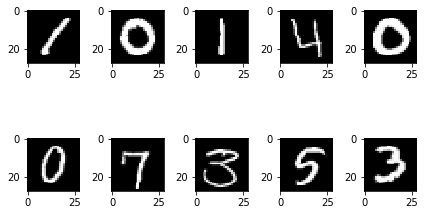

In [3]:
# Raw Data Laoding
df = pd.read_csv(r"C:\Users\lee_0\Desktop\코딩\ML\12.07\train.csv")
# display(df)  # 42000 rows × 785 columns
# 확인해보니. . . 784개의 pixel정보가 있어요! label이 target(종속변수예요!)
# 독립변수(feature)는 당연히 784개예요!

# 결측치나 이상치는 없어요! (잘 정제되서 제공된 데이터이기 때문이예요!)
# 하지만 현업데이터를 처리할때는 반드시 체크해야 해요!

# 정규화하기 전에 일단 이 이미지가 어떤 이미지인지 눈으로 한번 확인하고 넘어가요!

img_data = df.drop('label', axis=1, inplace=False).values

# 10장의 그림을 확인해 보아요!
# 2행 5열로 출력할 꺼예요! => subplot을 이용해서 그러면 되요!
fig = plt.figure()  # 큰 도화지를 준비해요.
fig_arr = []  # subplot을 저장하는 list

for n in range(10):
    fig_arr.append(fig.add_subplot(2, 5, n+1))
    fig_arr[n].imshow(img_data[n].reshape(28, 28),
                      cmap='gray',
                      interpolation='nearest')
plt.tight_layout()
plt.show()

# feature enginerring 할게 없어요!

x_data = df.drop('label', axis=1, inplace=False).values
t_data = df['label'].values  # one-hot encoding처리를 해야 해요!
                                        # keras기능을 이용해서 one-hot을 자동으로 처리!

# 정규화는 당연히 진행해야 해요!
scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# train데이터와 test데이터로 분리
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm,
                 t_data,
                 test_size=0.3,
                 stratify=t_data,
                 random_state=1)

# 학습용 데이터 : 29,400개
# 평가용 데이터 : 12,600개

In [4]:
# 데이터가 준비되었으니. . . 모델 만들고 학습해 보아요!

keras_model = Sequential()

keras_model.add(Flatten(input_shape=(784,)))
keras_model.add(Dense(units=10,
                      activation='softmax'))

keras_model.compile(optimizer=Adam(learning_rate=1e-4),
                    loss='sparse_categorical_crossentropy',
                    metrics=['acc'])

keras_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [5]:
# 학습을 진행해요!
history = keras_model.fit(x_data_train_norm,
                          t_data_train,
                          epochs=100,
                          verbose=1,
                          validation_split=0.2,
                          batch_size=100)

# learning_rate=1e-4
# loss: 0.2535 - acc: 0.9298 - val_loss: 0.2862 - val_acc: 0.9194

Epoch 1/100
236/236 [==============================] - 1s 2ms/step - loss: 2.0717 - acc: 0.3079 - val_loss: 1.7104 - val_acc: 0.6032
Epoch 2/100
236/236 [==============================] - 0s 1ms/step - loss: 1.4699 - acc: 0.6992 - val_loss: 1.2683 - val_acc: 0.7543
Epoch 3/100
236/236 [==============================] - 0s 1ms/step - loss: 1.1331 - acc: 0.7759 - val_loss: 1.0167 - val_acc: 0.7981
Epoch 4/100
236/236 [==============================] - 0s 983us/step - loss: 0.9346 - acc: 0.8062 - val_loss: 0.8609 - val_acc: 0.8248
Epoch 5/100
236/236 [==============================] - 0s 1ms/step - loss: 0.8070 - acc: 0.8267 - val_loss: 0.7571 - val_acc: 0.8410
Epoch 6/100
236/236 [==============================] - 0s 1ms/step - loss: 0.7184 - acc: 0.8413 - val_loss: 0.6826 - val_acc: 0.8515
Epoch 7/100
236/236 [==============================] - 0s 1ms/step - loss: 0.6533 - acc: 0.8519 - val_loss: 0.6270 - val_acc: 0.8597
Epoch 8/100
236/236 [==============================] - 0s 1ms/step 

In [6]:
# 학습이 잘 진행되었어요!
# 이제 평가를 진행해 보아요!
print(keras_model.evaluate(x_data_test_norm, t_data_test))
# loss                           , acc
# [0.29073357582092285, 0.9186508059501648]

# 결과 report(accuracy, recall, precision, f1)값을 구해보아요!
# classification_report()를 이용하는데. . . 주의해야 할 점은 one-hot으로 표현하지 않아요!
# 1차원으로 표현해요(label값을 이용한 1차원 값으로 사용)

# 확률값을 label값으로 변환해야 해요!
predict_label = tf.argmax(keras_model.predict(x_data_test_norm), axis=1).numpy()

print(classification_report(t_data_test, predict_label))

394/394 [==============================] - 0s 579us/step - loss: 0.2911 - acc: 0.9168
[0.2911389470100403, 0.9168254137039185]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1240
           1       0.95      0.97      0.96      1405
           2       0.92      0.89      0.90      1253
           3       0.89      0.88      0.89      1305
           4       0.92      0.93      0.93      1222
           5       0.88      0.85      0.87      1139
           6       0.94      0.96      0.95      1241
           7       0.93      0.91      0.92      1320
           8       0.90      0.88      0.89      1219
           9       0.87      0.90      0.89      1256

    accuracy                           0.92     12600
   macro avg       0.92      0.92      0.92     12600
weighted avg       0.92      0.92      0.92     12600



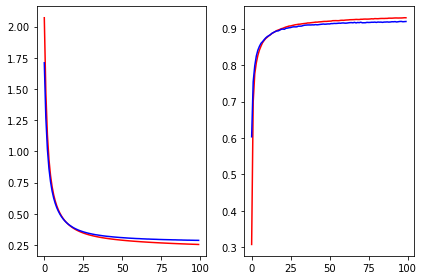

In [7]:
# 그래프를 그려보아요!
loss = history.history['loss']
acc = history.history['acc']

val_loss = history.history['val_loss']
val_acc = history.history['val_acc']

fig = plt.figure()

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.plot(loss, color='r')
ax1.plot(val_loss, color='b')

ax2.plot(acc, color='r')
ax2.plot(val_acc, color='b')

plt.tight_layout()
plt.show()

In [1]:
# 제출파일 형식으로 결과를 Kaggle에 제출해서
# 우리가 작성한 모델의 accuracy를 평가 받아 보아요!

# 각자 구현해 주세요!

In [7]:
# 필요한 module import 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam

# Raw Data Loading
df = pd.read_csv(r"C:\Users\lee_0\Desktop\코딩\ML\12.07\fashion-mnist_train.csv")
# display(df)  # 60000 rows × 785 columns

# 결측치나 이상치는 없어요! (잘 정데되서 제공된 데이터이기 때문이예요!)
# 하지만 현업데이터를 처리할때는 반드시 체크해야 해요!

# 정규화하기 전에 일단 이 이미지가 어떤 이미지인지 눈으로 한번 확인하고 넘어가요!

# img_data = df.drop('label', axis=1, inplace=False).values

# 10장의 그림을 확인해 보아요!
# 2행 5열로 출력할 꺼예요! => subplot을 이용해서 그리면 되요!
# fig = plt.figure()  # 큰 도화지를 준비해요.
# fig_arr = []  # subplot을 저장하는 lilst

# for n in range(10):
#     fig_arr.append(fig.add_subplot(2, 5, n+1))
#     fig_arr[n].imshow(img_data[n].reshape(28, 28),
#                       cmap='gray',
#                       interpolation='nearest')
# plt.tight_layout()
# plt.show()

# feature enginerring 할게 없어요!

x_data = df.drop('label', axis=1, inplace=False).values
t_data = df['label'].values  # one-hot encoding처리를 해야 해요!
                                       # keras기능을 이용해서 one-hot을 자동으로 처리!

# 정규화는 당연히 진행해야 해요!
scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# train데이터와 test데이터로 분리
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm,
                 t_data,
                 test_size=0.3,
                 stratify=t_data,
                 random_state=1)

# 데이터가 준비되었으니. . . 모델 만들고 학습해 보아요!

keras_model = Sequential()
keras_model.add(Flatten(input_shape=(784,)))
keras_model.add(Dense(units=10,
                      activation='softmax'))
keras_model.compile(optimizer=Adam(learning_rate=1e-4),
                    loss='sparse_categorical_crossentropy',
                    metrics=['acc'])
keras_model.summary()

# 학습을 진행해요!
history = keras_model.fit(x_data_train_norm,
                          t_data_train,
                          epochs=100,
                          verbose=1,
                          validation_split=0.2,
                          batch_size=100)

# learning_rate=1e-4
# loss: 0.3978 - acc: 0.8627 - val_loss: 0.4135 - val_acc: 0.8562

# 학습이 잘 진행되었어요!
# 이제 평가를 진행해 보아요!
print(keras_model.evaluate(x_data_test_norm, t_data_test))
# loss                          , acc
# [0.4360387325286865, 0.8536111116409302]

# 결과 report(accuracy, recall, precision, f1)값을 구해보아요!
# classification_report()를 이용하는데. . . 주의해야 할 점은 one-hot으로 표현하지 않아요!
# 1차원으로 표현해요!(label값을 이용한 1차우너 값으로 사용)

# 확률값을 label값으로 변환해야 해요!
predict_label = tf.argmax(keras_model.predict(x_data_test_norm), axis=1).numpy()
print(classification_report(t_data_test, predict_label))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
336/336 [==============================] - 1s 3ms/step - loss: 1.5756 - acc: 0.5143 - val_loss: 1.1546 - val_acc: 0.6687
Epoch 2/100
336/336 [==============================] - 1s 2ms/step - loss: 1.0170 - acc: 0.6884 - val_loss: 0.9055 - val_acc: 0.7165
Epoch 3/100
336/336 [==============================] - 1s 2ms/step - loss: 0.8520 - acc: 0.7254 - val_loss: 0.7945 - val_acc: 0.7402
Epoch 4/100
336/336 [============================